# Visualize Jona's beams

Apparently I don't understand Jonas's beam enough to make sense of his outputs...So the first bit of this notebook makes no sense at all.

In section 2 I use David's interpretation of the beam and plot stuff.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
beam_0_7 = np.loadtxt(
    '/fastpool/yuping/jonas-beams/farfield_source_f=0.70_1_foD_0p315_ThetaPhi0.1deg.ffs',
skiprows=31, dtype={'names': ('phi', 'theta', 're_e_theta', 'im_e_theta', 're_e_phi', 'im_e_phi'),
                   'formats': ['f'] * 6})

In [10]:
beam_0_7['im_e_phi'][0]

0.057920363

(1.0, 60.0)

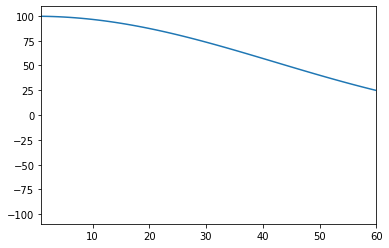

In [14]:
plt.plot(beam_0_7['re_e_theta'])
plt.xlim([1,60])

phi is azimuthal angle and theta the other angle. Theta varies first in the data.

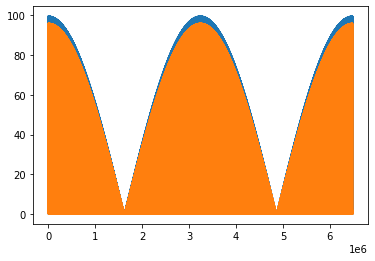

In [26]:
plt.plot(np.abs(beam_0_7['re_e_theta']), label='re_e_theta')
plt.plot(np.abs(beam_0_7['im_e_theta']), label='im_e_theta')

In [28]:
beam_0_7[1500000]

(83.2, 156.8, 0.02777795, -0.00358521, 0.15281165, -0.20650217)

In [37]:
beam_0_7[4862700]

(270., 0., 0.07252419, -0.05792036, 99.62479, 96.0299)

In [40]:
beam_0_7[1620900]

(90., 0., -0.07252419, 0.05792036, -99.62479, -96.0299)

In [36]:
np.argmax(beam_0_7['re_e_phi'])

4862700

In [38]:
np.argmin(beam_0_7['re_e_phi'])

1620900

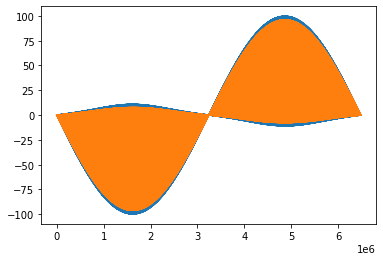

In [43]:
plt.plot(beam_0_7['re_e_phi'])
plt.plot(beam_0_7['im_e_phi'])

near phi=90 and 270 degrees, the phi component gets big. Near phi=0 and 180, the theta component is big. I think the E vector points in the polarization direction.

(0.0, 200.0)

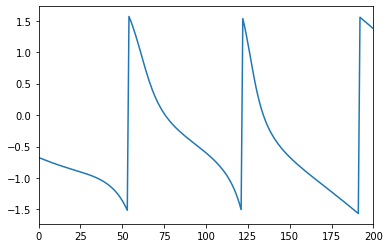

In [54]:
plt.plot(np.arctan(beam_0_7['im_e_phi']/beam_0_7['re_e_phi']))
plt.xlim([0, 200])

(0.0, 200.0)

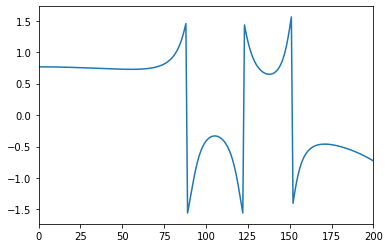

In [55]:
plt.plot(np.arctan(beam_0_7['im_e_theta']/beam_0_7['re_e_theta']))
plt.xlim([0, 200])

Try to recover the X (or Y) component...

(0.0, 10000.0)

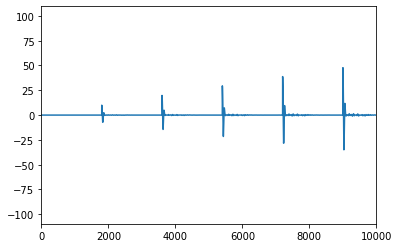

In [65]:
plt.plot(np.sqrt(beam_0_7['re_e_theta']**2
                 + beam_0_7['re_e_phi']**2) * np.cos(beam_0_7['theta'])
         * np.sin(beam_0_7['phi']))
plt.xlim([0,10000])

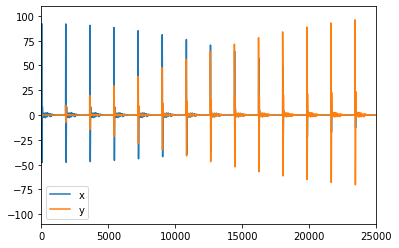

In [71]:
plt.plot(np.sqrt(beam_0_7['re_e_theta']**2
                 + beam_0_7['re_e_phi']**2) * np.sin(beam_0_7['theta'])
         * np.cos(beam_0_7['phi']), label='x')
plt.plot(np.sqrt(beam_0_7['re_e_theta']**2
                 + beam_0_7['re_e_phi']**2) * np.cos(beam_0_7['theta'])
         * np.sin(beam_0_7['phi']), label='y')
plt.xlim([0,25000])
plt.legend()

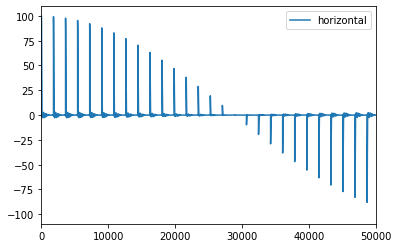

In [76]:
plt.plot(beam_0_7['re_e_theta']*np.cos(beam_0_7['phi']) -
         np.sin(beam_0_7['phi'])*beam_0_7['re_e_phi'], label='horizontal')
plt.xlim([0,50000])
plt.legend()

(0.0, 200.0)

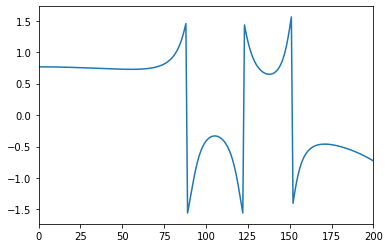

In [95]:
plt.plot(np.arctan(beam_0_7['im_e_theta']/beam_0_7['re_e_theta']))
plt.xlim([0,200])

## Try to do a 2D thing

In [106]:
x = beam_0_7['theta'] * np.cos(beam_0_7['phi'])
y = beam_0_7['theta'] * np.sin(beam_0_7['phi'])

In [100]:
beam_0_7 = beam_0_7.reshape((3601, 1801))

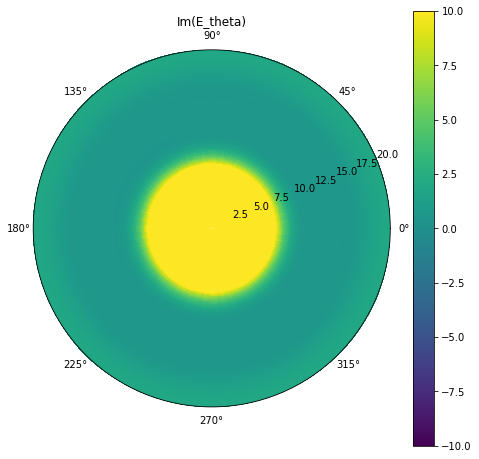

In [146]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar = True)
p = ax.pcolormesh(beam_0_7['phi'], beam_0_7['theta'], beam_0_7['im_e_theta'],
                  shading='nearest', vmin=-10, vmax=10)
ax.set_title('Im(E_theta)')
ax.set_rlim(0,20)
fig.colorbar(p)

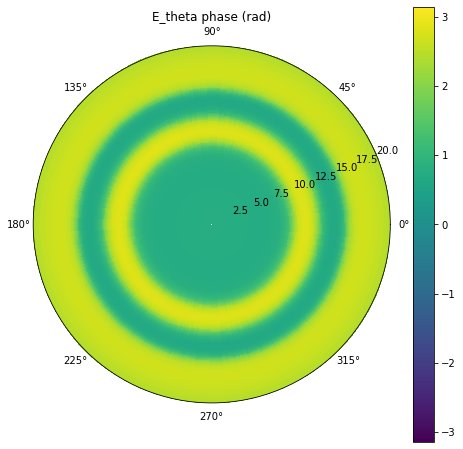

In [151]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar = True)
p = ax.pcolormesh(beam_0_7['phi'], beam_0_7['theta'],
                  np.arctan2(beam_0_7['im_e_theta'], beam_0_7['re_e_theta']),
                  shading='nearest')
ax.set_title('E_theta phase (rad)')
ax.set_rlim(0,20)
fig.colorbar(p)

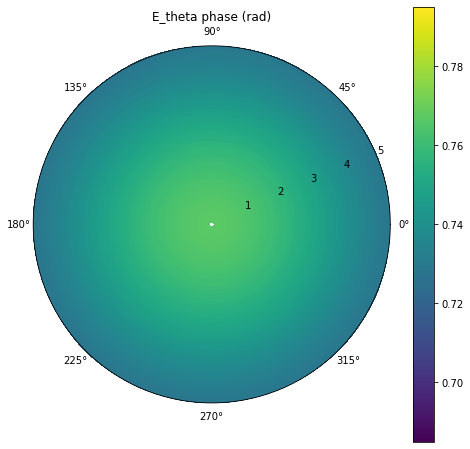

In [157]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar = True)
p = ax.pcolormesh(beam_0_7['phi'], beam_0_7['theta'],
                  np.arctan2(beam_0_7['im_e_theta'], beam_0_7['re_e_theta']),
                  shading='nearest',vmin=3.14/4-0.1, vmax=3.14/4+0.01)
ax.set_title('E_theta phase (rad)')
ax.set_rlim(0,5)
fig.colorbar(p)

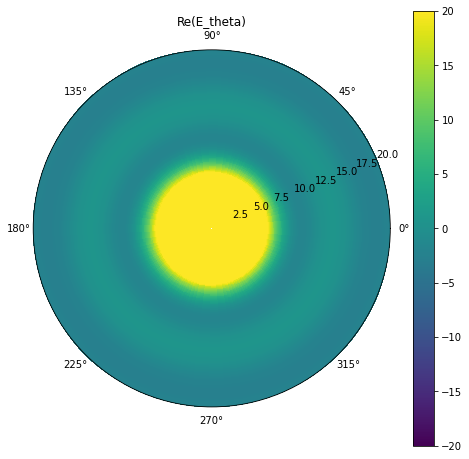

In [149]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar = True)
p = ax.pcolormesh(beam_0_7['phi'], beam_0_7['theta'], beam_0_7['re_e_theta'],
                  shading='nearest', vmin=-20, vmax=20)
ax.set_title('Re(E_theta)')
ax.set_rlim(0,20)
fig.colorbar(p)

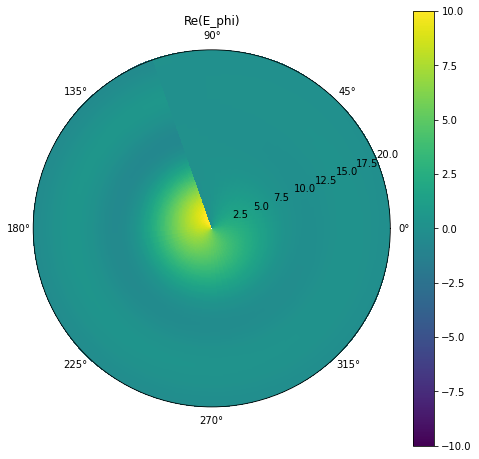

In [160]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar = True)
p = ax.pcolormesh(beam_0_7['phi'], beam_0_7['theta'], beam_0_7['re_e_phi'],
                  shading='nearest', vmin=-10, vmax=10)
ax.set_rlim(0,20)
ax.set_title('Re(E_phi)')
fig.colorbar(p)

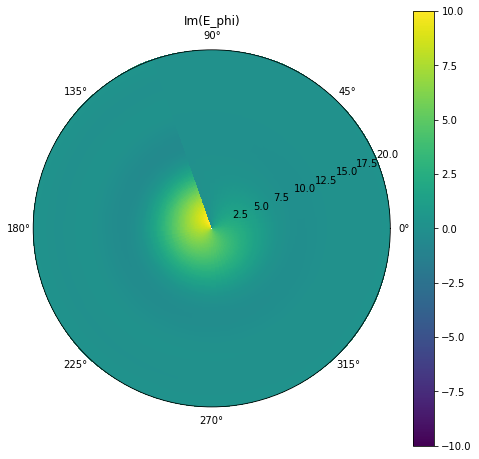

In [161]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar = True)
p = ax.pcolormesh(beam_0_7['phi'], beam_0_7['theta'], beam_0_7['im_e_phi'],
                  shading='nearest', vmin=-10, vmax=10)
ax.set_title('Im(E_phi)')
ax.set_rlim(0,20)
fig.colorbar(p)

# Take two

In [4]:
beam_2_0_data = np.loadtxt(
    '/fastpool/yuping/jonas-beams/Jonas_f=2.00.csv', delimiter=',',
skiprows=1, dtype={'names': ('phi', 'theta', 'Xamp', 'Xph', 'Yamp', 'Yph'),
                   'formats': ['f'] * 6})

In [5]:
cut = beam_2_0_data['phi'] == 0.
phi_cut = beam_2_0_data['phi'][cut]
theta_cut = beam_2_0_data['theta'][cut]
pow_cut = beam_2_0_data['Xamp'][cut]**2

In [6]:
cut2 = beam_2_0_data['phi'] == 45.

In [7]:
beam_2_0_data['theta'][cut2]

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ],
      dtype=float32)

In [8]:
np.argmin(np.abs(beam_2_0_data['Xamp'][cut2]**2 - 0.5))

10

In [9]:
beam_2_0_data['theta'][cut2][10]

1.1

In [10]:
pow_cut

array([1.00000000e+00, 9.93783057e-01, 9.78268921e-01, 9.54059005e-01,
       9.21722293e-01, 8.82032335e-01, 8.35913479e-01, 7.84413815e-01,
       7.28689790e-01, 6.69946492e-01, 6.09403491e-01, 5.48268378e-01,
       4.87686843e-01, 4.28712934e-01, 3.72285903e-01, 3.19201767e-01,
       2.70098746e-01, 2.25446612e-01, 1.85546607e-01, 1.50534451e-01,
       1.20387055e-01, 9.49453264e-02, 7.39312470e-02, 5.69675490e-02,
       4.36112881e-02, 3.33759487e-02, 2.57545989e-02, 2.02492382e-02,
       1.63881220e-02, 1.37421619e-02, 1.19396541e-02, 1.06727676e-02,
       9.70132183e-03, 8.85126274e-03, 8.01023748e-03, 7.12026749e-03,
       6.16621645e-03, 5.16575528e-03, 4.15800372e-03, 3.19140684e-03,
       2.31518364e-03, 1.57162687e-03, 9.90136061e-04, 5.84759109e-04,
       3.53558920e-04, 2.79691245e-04, 3.34784912e-04, 4.83142125e-04,
       6.85850333e-04, 9.06001776e-04, 1.11257075e-03], dtype=float32)

In [11]:
np.argmin(np.abs(pow_cut-0.5))

12

In [12]:
theta_cut[12]

1.2

In [13]:
theta_cut[11]

1.1

In [14]:
theta_cut[13]

1.3

In [15]:
pow_cut[12]

0.48768684

In [16]:
pow_cut.max()

1.0

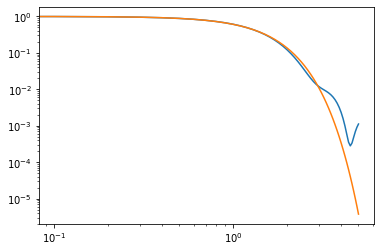

In [17]:
plt.plot(theta_cut, pow_cut)
plt.plot(theta_cut, np.exp(-theta_cut**2/ (2 * np.power(1.0001, 2.))))
plt.yscale('log')
plt.xscale('log')

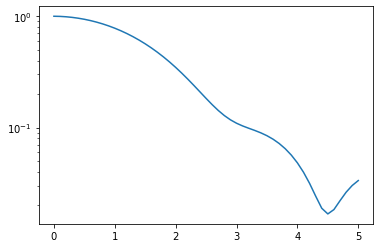

In [22]:
plt.plot(theta_cut, np.real(beam_2_0_data['Xamp'][cut]))
plt.yscale('log')

In [8]:
beam_2_0_data['Xamp']

array([1.        , 0.9968867 , 0.996841  , ..., 0.03335178, 0.03334769,
       0.03335522], dtype=float32)

In [4]:
beam_2_0 = beam_2_0_data['Xamp'] * np.exp(beam_2_0_data['Xph'] * 1j * np.pi/180)

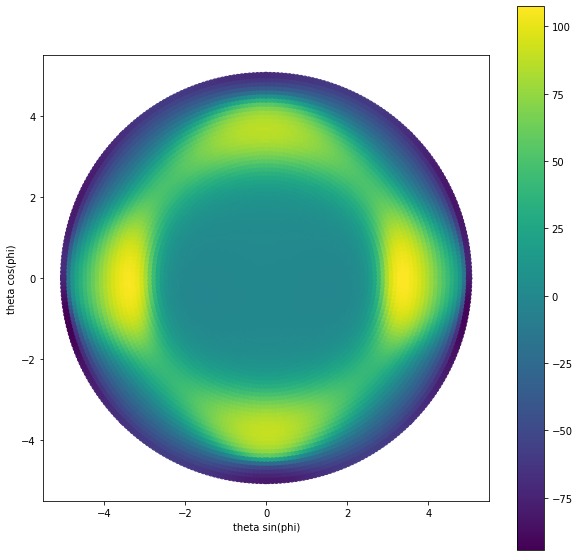

In [10]:
plt.figure(figsize=(10,10))
plt.scatter(beam_2_0_data['theta'] * np.sin(beam_2_0_data['phi'] * np.pi / 180),
            beam_2_0_data['theta'] * np.cos(beam_2_0_data['phi'] * np.pi / 180),
           c=np.angle(beam_2_0, deg=True), s=30)
plt.gca().set_aspect('equal')
plt.xlabel('theta sin(phi)')
plt.ylabel('theta cos(phi)')
plt.colorbar()

In [198]:
beam_2_0.real.min()

-0.013000528

<ipython-input-197-b7d4fd37589c>:4: RuntimeWarning: invalid value encountered in log
  c=np.log(beam_2_0.real), s=30)


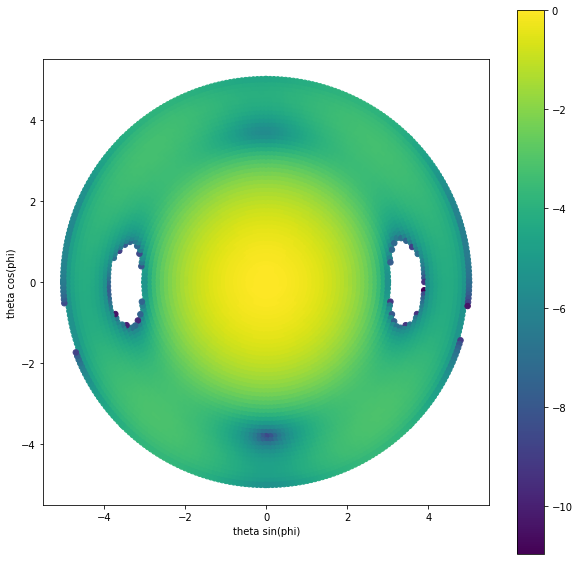

In [197]:
plt.figure(figsize=(10,10))
plt.scatter(beam_2_0_data['theta'] * np.sin(beam_2_0_data['phi'] * np.pi / 180),
            beam_2_0_data['theta'] * np.cos(beam_2_0_data['phi'] * np.pi / 180),
           c=np.log(beam_2_0.real), s=30)
plt.gca().set_aspect('equal')
plt.xlabel('theta sin(phi)')
plt.ylabel('theta cos(phi)')
plt.colorbar()

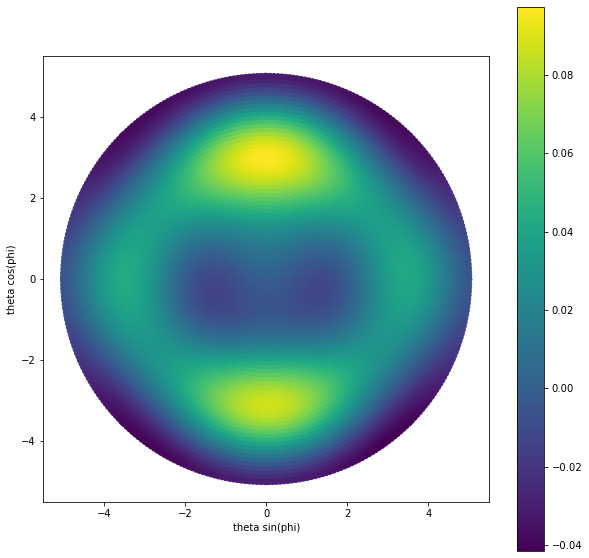

In [194]:
plt.figure(figsize=(10,10))
plt.scatter(beam_2_0_data['theta'] * np.sin(beam_2_0_data['phi'] * np.pi / 180),
            beam_2_0_data['theta'] * np.cos(beam_2_0_data['phi'] * np.pi / 180),
           c=beam_2_0.imag, s=30)
plt.gca().set_aspect('equal')
plt.xlabel('theta sin(phi)')
plt.ylabel('theta cos(phi)')
plt.colorbar()

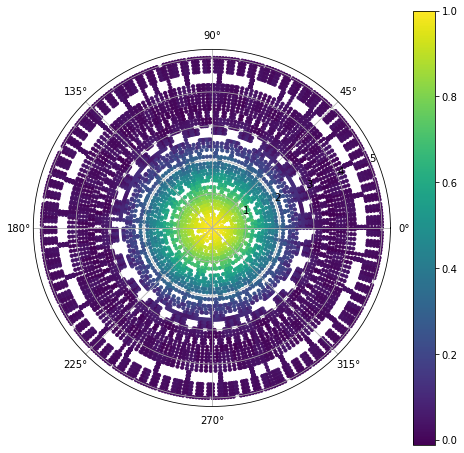

In [8]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar = True)
p = ax.scatter(beam_2_0_data['phi'], beam_2_0_data['theta'], c=beam_2_0.real, s=10)
fig.colorbar(p)

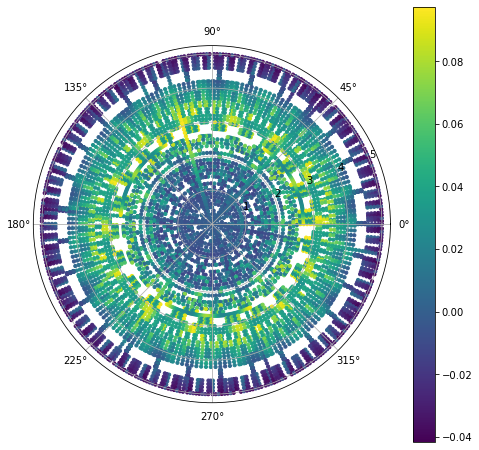

In [9]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar = True)
p = ax.scatter(beam_2_0_data['phi'], beam_2_0_data['theta'], c=beam_2_0.imag, s=10)
fig.colorbar(p)

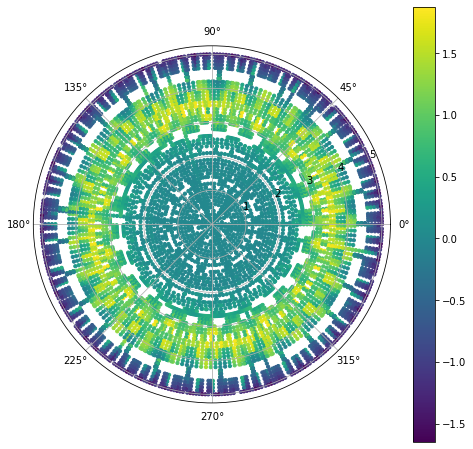

In [191]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar = True)
p = ax.scatter(beam_2_0_data['phi'], beam_2_0_data['theta'], c=np.angle(beam_2_0), s=10)
fig.colorbar(p)

In [203]:
np.sin(5 * np.pi/180)

0.08715574274765817

In [5]:
from scipy.interpolate import griddata, interp2d
l, m = np.mgrid[-0.09:0.09:1001j, -0.09:0.09:1001j]
ldata = np.sin(beam_2_0_data['theta'] * np.pi / 180) * np.cos(beam_2_0_data['phi'] * np.pi / 180)
mdata = np.sin(beam_2_0_data['theta'] * np.pi / 180) * np.sin(beam_2_0_data['phi'] * np.pi / 180)

beam_interp = griddata((ldata, mdata), beam_2_0, (l, m))

([], [])

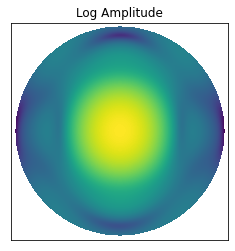

In [98]:
plt.imshow(np.log10(np.abs(beam_interp)))
plt.title('Log Amplitude')
plt.xticks([])
plt.yticks([])

([], [])

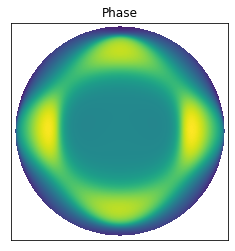

In [97]:
plt.imshow(np.angle((beam_interp)))
plt.title('Phase')
plt.xticks([])
plt.yticks([])

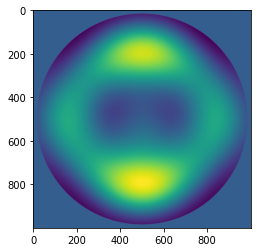

In [96]:
plt.imshow(beam_interp.imag)

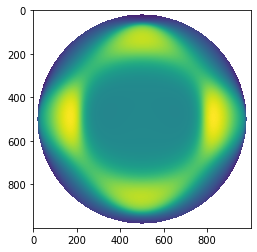

In [95]:
plt.imshow(np.angle(beam_interp))

Interpolating in l,m space seems to work a lot better. l and m should scale as 1/f since the offset angle scales as f.

In [6]:
from pointing import get_pointing_error
sep_deg, pa_deg = get_pointing_error(1/60, 2048)

In [7]:
pa_deg

array([137.26125736, 128.07445339,  18.91953866, ..., 229.16401675,
        25.23062547, 329.511968  ])

In [8]:
sep_deg

array([-0.01272205,  0.01321162,  0.00081302, ..., -0.01946848,
        0.00207323, -0.01183083])

Add pa and sep to pointing center and then use ra dec to lm

In [9]:
from astropy.coordinates import SkyCoord
import astropy.units as u
from africanus.coordinates.dask import radec_to_lm

pcenter = SkyCoord(ra = 0. * u.deg, dec=37.129833 * u.deg)
pointings = pcenter.directional_offset_by(pa_deg * u.deg, sep_deg * u.deg)

In [10]:
pointings

<SkyCoord (ICRS): (ra, dec) in deg
    [(3.59989169e+02, 37.13917629), (1.30435192e-02, 37.12168488),
     (3.30646802e-04, 37.13060209), ..., (1.84780984e-02, 37.14256192),
     (1.10848880e-03, 37.13170844), (7.52776574e-03, 37.11963772)]>

In [132]:
pcenter.dec.to(u.radian).value

0.6480378365656437

In [133]:
np.array([[pointings.ra.to(u.radian).value, pointings.dec.to(u.radian).value]]).shape

(1, 2, 2048)

In [11]:
lms = radec_to_lm(np.array([pointings.ra.to(u.radian).value, pointings.dec.to(u.radian).value]).T,
                  phase_centre=np.array([pcenter.ra.to(u.radian).value, pcenter.dec.to(u.radian).value]))

In [12]:
res = lms.compute()

In [13]:
res

array([[-1.50689981e-04,  1.63079772e-04],
       [ 1.81519873e-04, -1.42199112e-04],
       [ 4.60089754e-06,  1.34231833e-05],
       ...,
       [ 2.57079147e-04,  2.22186667e-04],
       [ 1.54242194e-05,  3.27327090e-05],
       [ 1.04762835e-04, -1.77936982e-04]])

In [14]:
l.shape

(1001, 1001)

In [15]:
res[:,0].min()

-0.0008637290992873928

In [16]:
res[:,0].max()

0.0008478454304486518

In [17]:
res[:,1].max()

0.0009646969053976329

In [18]:
res[:,0].max()

0.0008478454304486518

In [19]:
m[0].max(), m[0].min()

(0.09, -0.09)

In [20]:
from scipy.interpolate import RegularGridInterpolator
# beams_2ghz = RectBivariateSpline(m[0], m[0], beam_interp.real)(res[:,0], res[:,1], grid=False)
f = RegularGridInterpolator((m[0], m[0]), beam_interp)

In [21]:
f([0, 0])

array([1.-6.57989156e-17j])

In [22]:
res.shape

(2048, 2)

In [23]:
beams_2ghz = f(res)

In [24]:
beams_2ghz

array([0.99974161-1.25802547e-04j, 0.99957635+1.04753286e-04j,
       0.99997058+1.93644857e-06j, ..., 0.99934904+1.69150474e-04j,
       0.99992238+7.76471298e-06j, 0.99962663+4.14348427e-05j])

Text(0.5, 1.0, 'Amplitude')

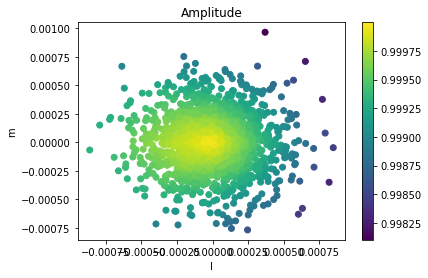

In [25]:
plt.scatter(res[:,0], res[:,1], c=np.abs(beams_2ghz))
plt.colorbar()
plt.xlabel('l')
plt.ylabel('m')
plt.title('Amplitude')

Text(0.5, 1.0, 'Phase (deg)')

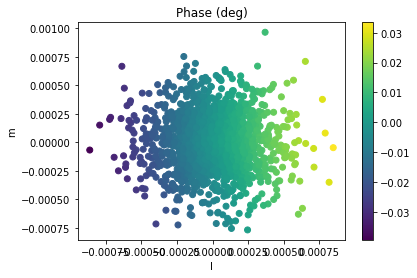

In [26]:
plt.scatter(res[:,0], res[:,1], c=np.angle(beams_2ghz, deg=True))
plt.colorbar()
plt.xlabel('l')
plt.ylabel('m')
plt.title('Phase (deg)')

In [27]:
np.abs(beams_2ghz).max()

0.9999996906132572

In [28]:
np.abs(beams_2ghz).min()

0.9981015954682096

# First defocus mode Noll#=4, m-0, n=2

In [30]:
from scipy.special import jv
def defocus(ls, ms, freq):
    lamd_m = 3e8/freq
    r = np.sqrt(ls**2 + ms**2) * 5 / (2 * lamd_m)
    # 1 mm amp
    deform = -1j * (2*np.pi*1e-3/lamd_m) * jv(3, r)/r
    return deform

In [31]:
deform[deform.shape[0]//2,deform.shape[1]//2] = 0

NameError: name 'deform' is not defined

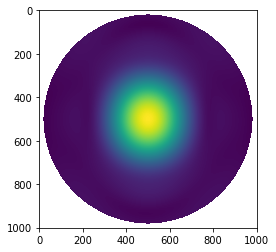

In [164]:
plt.imshow(np.abs(deform + beam_interp))

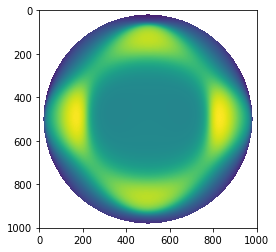

In [165]:
plt.imshow(np.angle(deform + beam_interp))

In [177]:
beams_2ghz_defocused = beams_2ghz + defocus(res[:,0], res[:,1], 2e9)

In [178]:
beams_2ghz_defocused

array([0.99975799+4.18869841e-05j, 0.99992657+2.61880568e-05j,
       0.99996381+6.42073720e-06j, ..., 0.99945907+6.05353199e-05j,
       0.99954512+1.18360290e-04j, 0.99962018-3.07173414e-04j])

In [182]:
f(res).shape

(2048,)

In [32]:
all_gains = np.ones((2048, 8000, 2, 2), dtype=np.complex128)

In [33]:
for chan in range(8000):
    freq = (chan * 162.5e3) + 0.7e9
    all_gains[:, chan, :, :] = (f(res * freq/2e9) + np.random.normal() * defocus(res[:,0], res[:,1], freq))[:,None, None] * np.identity(2)

In [34]:
np.abs(all_gains[:, :, 0, 0]).min()

0.9981017497010506

Text(0.5, 1.0, 'Amplitude')

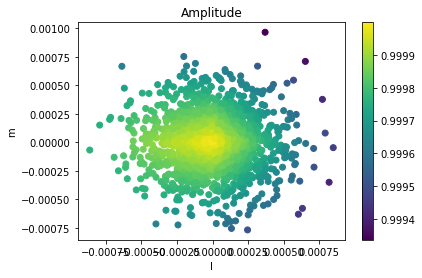

In [35]:
plt.scatter(res[:,0], res[:,1], c=np.abs(all_gains[:, 0, 0, 0]))
plt.colorbar()
plt.xlabel('l')
plt.ylabel('m')
plt.title('Amplitude')

Text(0.5, 1.0, 'Amplitude')

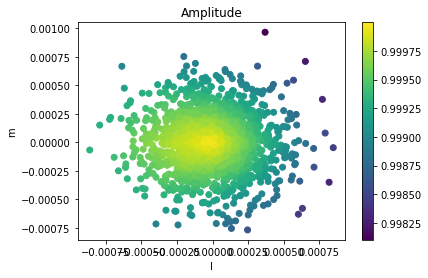

In [36]:
plt.scatter(res[:,0], res[:,1], c=np.abs(all_gains[:, -1, 0, 0]))
plt.colorbar()
plt.xlabel('l')
plt.ylabel('m')
plt.title('Amplitude')

In [37]:
all_gains = all_gains[None, :]

In [38]:
all_gains.shape

(1, 2048, 8000, 2, 2)

In [39]:
import dftsource
dftsource.point_src_with_gain(all_gains, '/fastpool/data/gh/W-snapshot-8000chan.ms', rms=0.366268 * np.sqrt(900/15))

[########################################] | 100% Completed |  6hr 41min 10.8s
